# Exercise 5.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

**Simple Network**

We continue with the dataset first encountered in the previous exercise. Please refer to the discussion there for an introduction to the data and the learning objective.

Here, we manually implement a simple network architecture

In [ ]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

/bin/sh: wget: command not found


In [3]:
# Before working with the data,
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

#Normalize each feature
for i in range(11):
    data[:,i] = (data[:,i] - np.mean(data[:,i])) / np.std(data[:,i])

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [-1.01304317  0.01745194  0.04800112 -0.94476527  3.35203347 -0.13572658
 -0.80860543 -0.64447785  0.01148034 -0.96260494 -0.2553989 ]
Quality: 6.0


# Problems

The goal is to implement the training of a neural network with one input layer, one hidden layer, and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one data point to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple data points and even over several epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [4]:
# Initialise weights with suitable random distributions
hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset

W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)
print(b.shape)
print(Wp.shape)
print(bp.shape)

(50, 11)
(50,)
(50,)
(1,)


In [5]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [6]:
def dnn(x,W,b,Wp,bp):
    # TODO Calculate and return network output of forward pass
    # See Hint 1 for additional information
    return np.dot(Wp,relu(np.dot(W,x)+b))+bp

    #return -1 # change to the calculated output

In [7]:
def update_weights(x,y, W, b, Wp, bp):
    
    learning_rate = 0.001

    # TODO: Calculate the network output (use the function dnn defined above)
    y_pred = dnn(x,W,b,Wp,bp)

    # TODO: Derive the gradient for each of W,b,Wp,bp by taking the partial
    # derivative of the loss function with respect to the variable and
    # then implement the resulting weight-update procedure
    # See Hint 2 for additional information
    bp_grad = 2*(y_pred-y)
    #outputs a (1,) vector
    
    b_grad = 2*(y_pred-y)*Wp*np.heaviside((np.dot(W,x)+b),0)
    #outputs a (50,) vector

    Wp_grad = 2*(y_pred-y)*relu((np.dot(W,x)+b))
    #outputs a (50,) vector

    W_grad = np.outer(b_grad,x)
    #outputs a (50,11) matrix
    
    # You might need these numpy functions:
    # np.dot, np.outer, np.heaviside
    # Hint: Use .shape and print statements to make sure all operations
    # do what you want them to
    W_new = W - learning_rate * W_grad
    b_new = b - learning_rate * b_grad
    Wp_new = Wp - learning_rate * Wp_grad
    bp_new = bp - learning_rate * bp_grad

    # TODO: Update the weights/bias following the rule:  weight_new = weight_old - learning_rate * gradient

    return W_new, b_new, Wp_new, bp_new # return the new weights

# Training loop and evaluation below

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<02:44,  6.06it/s]

Epoch: 0 Train Loss: 0.6375079443686432 Test Loss: 0.643990315097502
Epoch: 1 Train Loss: 0.5795160342030001 Test Loss: 0.5947150124572729


  0%|          | 4/1000 [00:00<02:39,  6.25it/s]

Epoch: 2 Train Loss: 0.5611216803478313 Test Loss: 0.5787159060053042
Epoch: 3 Train Loss: 0.5508862508922375 Test Loss: 0.5707247542707172


  1%|          | 6/1000 [00:00<02:37,  6.29it/s]

Epoch: 4 Train Loss: 0.5449065781971013 Test Loss: 0.5655344173173232
Epoch: 5 Train Loss: 0.5410641750752372 Test Loss: 0.5633829532701669


  1%|          | 8/1000 [00:01<02:35,  6.37it/s]

Epoch: 6 Train Loss: 0.5374398910758776 Test Loss: 0.5607306043447984
Epoch: 7 Train Loss: 0.5346151803012591 Test Loss: 0.5593123743725582


  1%|          | 10/1000 [00:01<02:38,  6.23it/s]

Epoch: 8 Train Loss: 0.5319512149888934 Test Loss: 0.5576617536196126
Epoch: 9 Train Loss: 0.5296286305739254 Test Loss: 0.5566505511895492


  1%|          | 12/1000 [00:01<02:39,  6.21it/s]

Epoch: 10 Train Loss: 0.5274463896134234 Test Loss: 0.5556739246008358
Epoch: 11 Train Loss: 0.5251980694952858 Test Loss: 0.5547409094731706


  1%|▏         | 14/1000 [00:02<02:38,  6.22it/s]

Epoch: 12 Train Loss: 0.522990911854478 Test Loss: 0.5536799381827078
Epoch: 13 Train Loss: 0.5210640854517745 Test Loss: 0.5523929030894033


  2%|▏         | 16/1000 [00:02<02:38,  6.22it/s]

Epoch: 14 Train Loss: 0.5189990998362138 Test Loss: 0.5512677151489843
Epoch: 15 Train Loss: 0.5171474394509323 Test Loss: 0.5502951384019459


  2%|▏         | 18/1000 [00:02<02:36,  6.26it/s]

Epoch: 16 Train Loss: 0.5154868124780727 Test Loss: 0.5495364910074511
Epoch: 17 Train Loss: 0.5137376760660219 Test Loss: 0.5487616820559529


  2%|▏         | 20/1000 [00:03<02:36,  6.24it/s]

Epoch: 18 Train Loss: 0.512221139112953 Test Loss: 0.5484407324815683
Epoch: 19 Train Loss: 0.5102311190234337 Test Loss: 0.5478892370175239


  2%|▏         | 22/1000 [00:03<02:35,  6.28it/s]

Epoch: 20 Train Loss: 0.5085105804738044 Test Loss: 0.5473797077631086
Epoch: 21 Train Loss: 0.5062713936883487 Test Loss: 0.5462693301754185


  2%|▏         | 24/1000 [00:03<02:35,  6.28it/s]

Epoch: 22 Train Loss: 0.5046125946674618 Test Loss: 0.5454861322568563
Epoch: 23 Train Loss: 0.5032088045870486 Test Loss: 0.54489510493899


  3%|▎         | 26/1000 [00:04<02:34,  6.29it/s]

Epoch: 24 Train Loss: 0.5014949009005154 Test Loss: 0.5440088300112434
Epoch: 25 Train Loss: 0.49968904002018394 Test Loss: 0.5429431690948171


  3%|▎         | 28/1000 [00:04<02:40,  6.06it/s]

Epoch: 26 Train Loss: 0.4982093995719243 Test Loss: 0.5423535984039484
Epoch: 27 Train Loss: 0.49658486094726345 Test Loss: 0.5417158648895898


  3%|▎         | 30/1000 [00:04<02:36,  6.18it/s]

Epoch: 28 Train Loss: 0.49467237620544746 Test Loss: 0.540592134353917
Epoch: 29 Train Loss: 0.4930583029191872 Test Loss: 0.5398039700355068


  3%|▎         | 32/1000 [00:05<02:35,  6.22it/s]

Epoch: 30 Train Loss: 0.4913332274975965 Test Loss: 0.5390156404612
Epoch: 31 Train Loss: 0.48895936918295807 Test Loss: 0.5376574310076097


  3%|▎         | 34/1000 [00:05<02:33,  6.29it/s]

Epoch: 32 Train Loss: 0.48688623146776694 Test Loss: 0.5365530744488961
Epoch: 33 Train Loss: 0.4847024177199247 Test Loss: 0.5355509909737849


  4%|▎         | 36/1000 [00:05<02:32,  6.32it/s]

Epoch: 34 Train Loss: 0.4830643393187873 Test Loss: 0.5348133294212952
Epoch: 35 Train Loss: 0.4815267762679269 Test Loss: 0.5341469283522001


  4%|▍         | 38/1000 [00:06<02:31,  6.34it/s]

Epoch: 36 Train Loss: 0.48005202286099696 Test Loss: 0.5337410682468405
Epoch: 37 Train Loss: 0.4784909801943922 Test Loss: 0.5327714025419478


  4%|▍         | 40/1000 [00:06<02:31,  6.34it/s]

Epoch: 38 Train Loss: 0.4771705842158342 Test Loss: 0.532498280494129
Epoch: 39 Train Loss: 0.47540289853999085 Test Loss: 0.5314725455504413


  4%|▍         | 42/1000 [00:06<02:32,  6.29it/s]

Epoch: 40 Train Loss: 0.4745228030215271 Test Loss: 0.531921045620443
Epoch: 41 Train Loss: 0.4733120578392176 Test Loss: 0.5318061278019272


  4%|▍         | 44/1000 [00:07<02:37,  6.08it/s]

Epoch: 42 Train Loss: 0.47194743157752744 Test Loss: 0.5316242051801966
Epoch: 43 Train Loss: 0.4707310537028709 Test Loss: 0.5316464808685453


  5%|▍         | 46/1000 [00:07<02:33,  6.21it/s]

Epoch: 44 Train Loss: 0.46953664015042657 Test Loss: 0.5315745688505501
Epoch: 45 Train Loss: 0.4683440495370055 Test Loss: 0.5315990676558564


  5%|▍         | 48/1000 [00:07<02:32,  6.25it/s]

Epoch: 46 Train Loss: 0.4672813222819393 Test Loss: 0.5316060878574806
Epoch: 47 Train Loss: 0.46660952138940714 Test Loss: 0.5320387312327661


  5%|▍         | 48/1000 [00:07<02:35,  6.10it/s]


Epoch: 48 Train Loss: 0.4655445568111993 Test Loss: 0.5318651254129594
Early stopping at epoch 48
Best loss: 0.5314725455504413 Final loss: 0.5318651254129594
Correlation coefficient: 0.5875912367738428


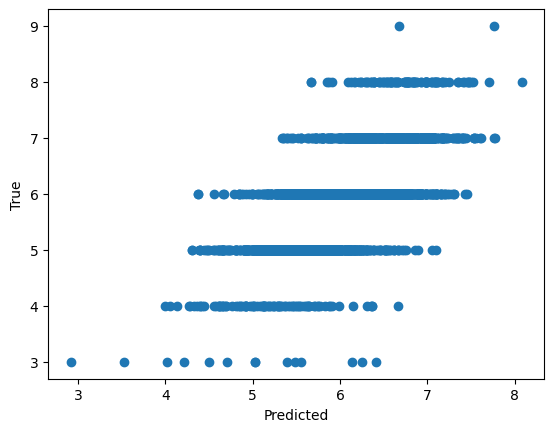

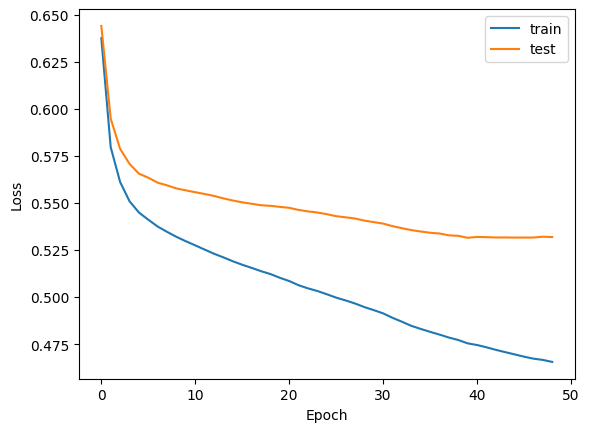

In [8]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above,
# you should not need to change anything below.
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
# This will just train for one epoch
# You will want a higher number once everything works
n_epochs = 1000

# Loop over the epochs
for ep in tqdm(range(n_epochs)):

    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):

        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        W,b,Wp,bp = update_weights(x,y,W,b,Wp,bp)

    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0]

    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)

    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    #implement early stopping
    if ep > 10:
        if np.mean([[test_losses[ep-6]], [test_losses[ep-5]], [test_losses[ep-4]]]) <= np.mean([[test_losses[ep-3]], [test_losses[ep-2]], [test_losses[ep-1]]]):
            print("Early stopping at epoch", ep)
            break


# After the training:

# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Hint 1

We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads:
$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

# Hint 2

For the regression problem the objective function is the mean squared error between the prediction and the true label $y$:
$$
L=(\hat{y}-y)^{2}
$$

Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:

$$
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{m i} x_{i}+b_{m}\right) x_{k}
\end{aligned}
$$

Here, $\Theta$ denotes the Heaviside step function.

Generall Comment

In Ex.4 I thought that the linear model we used was too simple to work on our data. In the exercise we use a slighly more complicated model than last time and we do indeed see a slightly better result and higher correlation coefficient. I also found that implementing early stopping was very good for testing different learning rates. If the model converged I dit not have to wait for the code to run over all epochs. The way I implemented early stopping was by after 10 epoch, for each epoch, check if the mean of the three latest values was higher than the mean of the three before them. In the beginning I also forgot to normalize my input features, which more or less resulted in the model being untrainable.